# # # ----- Python Project ----- # # #
# # # --- by Neil Manigbas --- # # #

# Data Exploration

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Suppress warning errors
import warnings
warnings.simplefilter(action='ignore')

In [3]:
# Change directory where data files are located
import os
os.chdir(r'C:\Users\nmanigba\Desktop\Neil Manigbas - Python Project\Data')

In [4]:
# Read files:
train = pd.read_csv("Store_Train_Forecast_Class.csv")
test = pd.read_csv("Store_Test_Forecast_Class.csv")

train['dataset']='train'
test['dataset']='test'

In [5]:
# Combining train and test datasets, ignoring index
data = pd.concat([train, test], ignore_index=True)
print (train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [6]:
# Statistics
print(data.describe())

           Item_MRP  Item_Outlet_Sales  Item_Visibility   Item_Weight  \
count  14204.000000        8523.000000     14204.000000  11765.000000   
mean     141.004977        2181.288914         0.065953     12.792854   
std       62.086938        1706.499616         0.051459      4.652502   
min       31.290000          33.290000         0.000000      4.555000   
25%       94.012000         834.247400         0.027036      8.710000   
50%      142.247000        1794.331000         0.054021     12.600000   
75%      185.855600        3101.296400         0.094037     16.750000   
max      266.888400       13086.964800         0.328391     21.350000   

       Outlet_Establishment_Year  
count               14204.000000  
mean                 1997.830681  
std                     8.371664  
min                  1985.000000  
25%                  1987.000000  
50%                  1999.000000  
75%                  2004.000000  
max                  2009.000000  


In [7]:
# Null values count
print(data.apply(lambda x: sum(x.isnull())))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dataset                         0
dtype: int64


In [8]:
# Unique values count
print('\nUnique values')
print(data.apply(lambda x: len(x.unique())))


Unique values
Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
dataset                          2
dtype: int64


In [9]:
# Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
# Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','dataset']]
# Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (data[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

F

           Item_MRP  Item_Outlet_Sales  Item_Visibility   Item_Weight  \
count  14204.000000        8523.000000     14204.000000  11765.000000   
mean     141.004977        2181.288914         0.065953     12.792854   
std       62.086938        1706.499616         0.051459      4.652502   
min       31.290000          33.290000         0.000000      4.555000   
25%       94.012000         834.247400         0.027036      8.710000   
50%      142.247000        1794.331000         0.054021     12.600000   
75%      185.855600        3101.296400         0.094037     16.750000   
max      266.888400       13086.964800         0.328391     21.350000   

       Outlet_Establishment_Year  
count               14204.000000  
mean                 1997.830681  
std                     8.371664  
min                  1985.000000  
25%                  1987.000000  
50%                  1999.000000  
75%                  2004.000000  
max                  2009.000000  


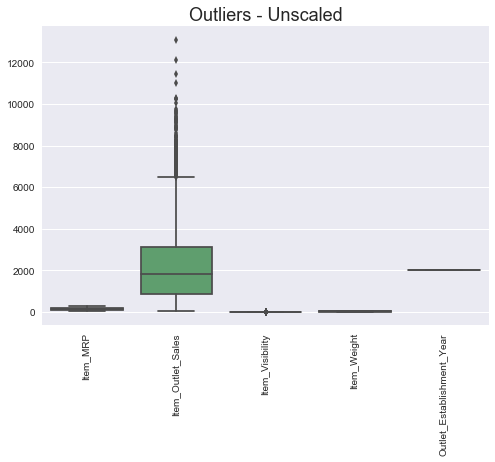

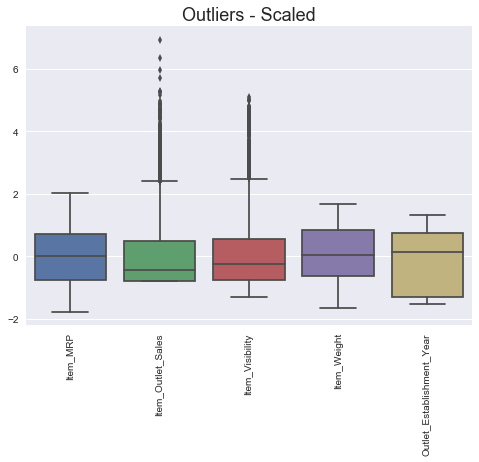

In [10]:
#Checking Outliers
print(data.describe())

import seaborn as sbn

graph=sbn.boxplot(data=data[data.columns[data.dtypes!='object']])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.title('Outliers - Unscaled',fontsize=18)
plt.show()

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_scaled=sc.fit_transform(np.nan_to_num(data[data.columns[data.dtypes!='object']].astype(float)))

graph=sbn.boxplot(data=data_scaled)
plt.xticks(list(range(0,len(data.columns[data.dtypes!='object']))),data[data.columns[data.dtypes!='object']].columns)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.title('Outliers - Scaled',fontsize=18)
plt.show()

In [11]:
# Dealing with the Outliers
from scipy import stats

z = np.abs(stats.zscore(data[data.columns[data.dtypes!='object']]))
print(len((np.where(z > 3))[0]),'outliers out of',len(data))    
print('%.2f'% (len((np.where(z > 3))[0])/len(data)*100),'% of the dataset')

173 outliers out of 14204
1.22 % of the dataset


# Data Cleaning

In [12]:
# IMPUTING Item_Weight variable

# Determine the average weight per item
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print ('Average weight for each item:')
print (item_avg_weight.head(10))

# Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull() 

# Impute data and check missing values count before and after imputation to confirm
print ('\nNull value count before imputing: %d'% sum(miss_bool))
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])
print ('Count after imputing: %d'% sum(data['Item_Weight'].isnull()))

Average weight for each item:
Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
DRB24     8.785
DRB25    12.300
DRB48    16.750
DRC01     5.920
DRC12    17.850
Name: Item_Weight, dtype: float64

Null value count before imputing: 2439
Count after imputing: 0


In [13]:
# IMPUTE Outlet_Size variable

# Import mode function
from scipy.stats import mode

# Determing the Outlet_Size mode for each Outlet_Type
outlet_size_mode = data.dropna().pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x: mode(x).mode[0]))
print ('Mode for each Outlet_Type:')
print (outlet_size_mode)

# Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull() 

# Impute data and check missing values count before and after imputation to confirm
print ('\nNull value count before imputing: %d'% sum(miss_bool))
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print ('Count after imputing:',sum(data['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

Null value count before imputing: 4016
Count after imputing: 0


# Feature Engineering

In [14]:
# Modify Item_Visibility
# Found the minimum value is 0
# Consider it as missing information and impute it with mean visibility of that product

# Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)

print ('Number of 0 values before imputing: %d'%sum(miss_bool))
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
print ('Count after imputing: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values before imputing: 879
Count after imputing: 0


In [15]:
# Classify type of item

# Get the first two characters of ID
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
# Rename them to more intuitive categories
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
# Drop the column which have been converted
data.drop(['Item_Type'],axis=1,inplace=True)

print(data['Item_Type_Combined'].value_counts())

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64


In [16]:
# Determine the years of operation of a store
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']

# Drop the column which have been converted
data.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

print(data['Outlet_Years'].describe())

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64


In [17]:
# Modify categories of Item_Fat_Content

# Change categories of low fat
print ('Original Categories:')
print (data['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})


# Mark non-consumables as separate category
data.loc[data['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content'] = 'Non-Edible'
print ('\nModified Categories(v2):')
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:

Modified Categories(v2):
Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64


In [18]:
# Numerical and One-Hot Coding of Categorical variables

# Import library
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# New variable for Outlet_Identifier
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [19]:
# Exporting Data

# Divide into test and train
train = data.loc[data['dataset']=='train']
test = data.loc[data['dataset']=='test']

# Drop unnecessary columns
test.drop(['Item_Outlet_Sales','dataset'],axis=1,inplace=True)
train.drop(['dataset'],axis=1,inplace=True)


In [20]:
# Define target and ID columns
IDcol = ['Item_Identifier','Outlet_Identifier']
target = 'Item_Outlet_Sales'
predictors = [x for x in train.columns if x not in [target]+IDcol]

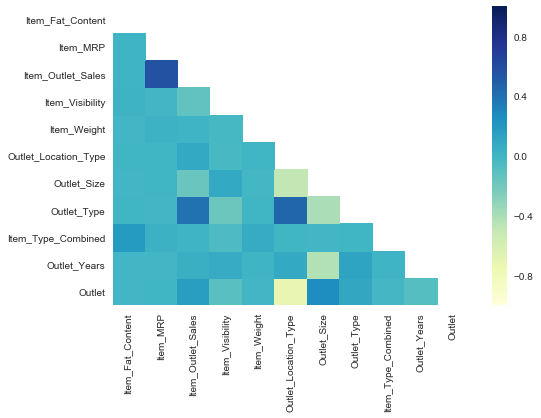

In [21]:
# Correlation heat map - part of data exploration
import seaborn as sbn

dcorr=train.corr()
mask = np.zeros_like(dcorr)
mask[np.triu_indices_from(mask)] = True
with sbn.axes_style("white"):
    ax = sbn.heatmap(dcorr, mask=mask, cmap="YlGnBu")
plt.show()

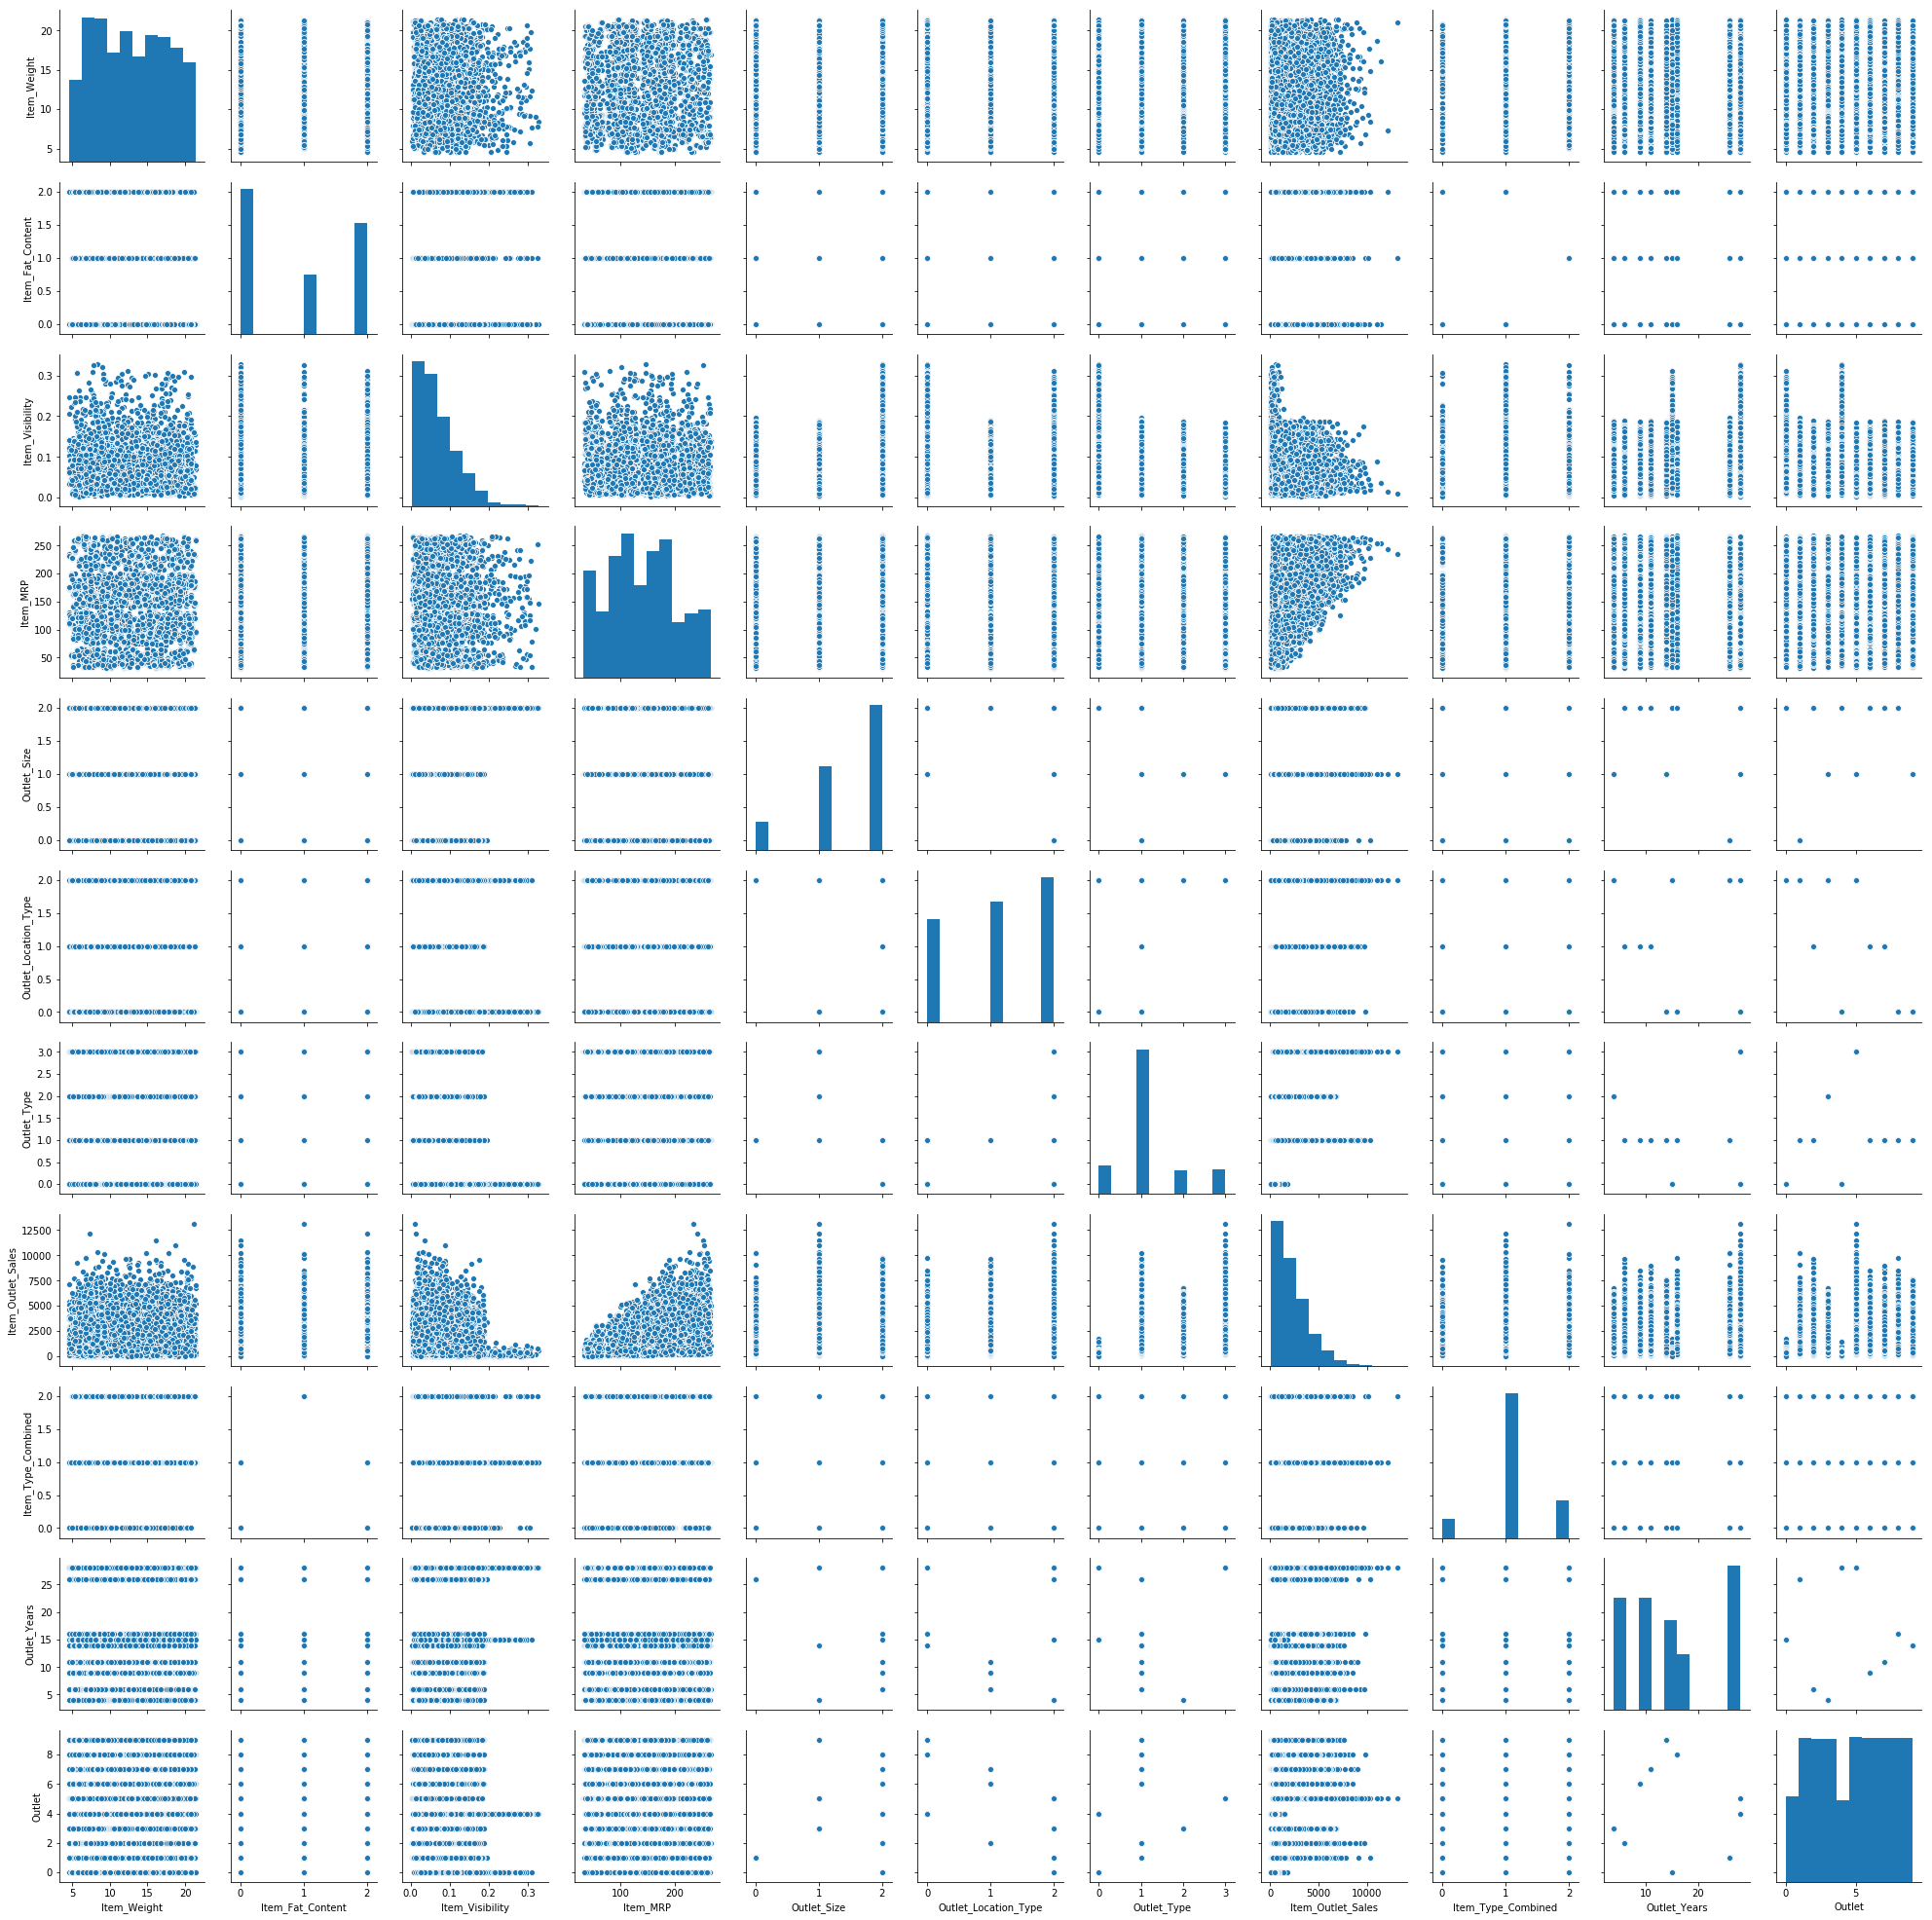

In [22]:
sbn.pairplot(train)

# Model Building

In [29]:
# Importing packages
from sklearn.model_selection import GridSearchCV
import datetime as dt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor

In [ ]:
# Perform GridSearch

# Assuming parameters
best_params =   {
        'LR':       [LinearRegression(),
                     {'normalize':['True','False']}],
        'Ridge':    [Ridge(),
                     {'alpha':[0.25,0.5,0.75],
                      'normalize':['True','False']}],
        'KNN':      [KNeighborsRegressor(),
                     {'n_neighbors':list(range(5,9)),
                      'weights':['uniform','distance']}],
        'adaboost': [AdaBoostRegressor(),
                     {'n_estimators':[50,60,70,80]}],
        'DT':       [DecisionTreeRegressor(),
                     {'max_depth':[None,5,10,15],
                      'min_samples_leaf':[100,150,200]}],
        'RF':       [RandomForestRegressor(),
                     {'n_estimators':[70,80,90,100],
                      'max_depth':[None,2,4,6,8],
                      'min_samples_leaf':[100,200,300],
                      'n_jobs':[2,3,4]}]
                }

# Performing Gridsearch
for i in best_params.keys():
    print(i+' '+'started...')
    strtime=dt.datetime.now()
    model=GridSearchCV(best_params[i][0],best_params[i][1],cv=5)
    model.fit(train[predictors],train[target])
    best_params[i]=model.best_params_
    end_sec=(dt.datetime.now()-strtime).total_seconds()
    print('...'+'DONE ('+str(end_sec)+' seconds)\n')

In [ ]:
# Print best parameters by Gridsearch
print(best_params)

In [67]:
# Create a function to return prediction scores
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import re

def cv_score(alg, dtrain, dtest, predictors, target):
    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain[(re.split('\(', str(alg), 1))[0]] = alg.predict(dtrain[predictors])
    
    # Perform cross-validation
    n=len(data)
    p=len(data[predictors].columns)
    cv_r2 = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='r2')
    cv_r2adj = (1-(1-cv_r2))*(n-1)/(n-p-1)
    cv_RMSE = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_RMSE = np.sqrt(np.abs(cv_RMSE))
    
    # Print model report
    r2={'mean':np.mean(cv_r2),'std':np.std(cv_r2),'min':np.min(cv_r2),'max':np.max(cv_r2)}
    r2adj={'mean':np.mean(cv_r2adj),'std':np.std(cv_r2adj),'min':np.min(cv_r2adj),'max':np.max(cv_r2adj)}
    RMSE={'mean':np.mean(cv_RMSE),'std':np.std(cv_RMSE),'min':np.min(cv_RMSE),'max':np.max(cv_RMSE)}
    model_report=pd.DataFrame([r2,r2adj,RMSE], index=['R^2','Adjusted R^2','RMSE'], columns=['mean','std','min','max'])
    print ('\nModel Report')
    print ('Algorithm : '+(re.split('\(', str(alg), 1))[0])
    print (model_report.round(4))

    # Predict on testing data
    dtest[(re.split('\(', str(alg), 1))[0]] = alg.predict(dtest[predictors])


Model Report
Algorithm : LinearRegression
                   mean      std        min        max
R^2              0.4989   0.0321     0.4183     0.5527
Adjusted R^2     0.4993   0.0321     0.4186     0.5531
RMSE          1203.2648  41.2453  1153.0999  1282.1921


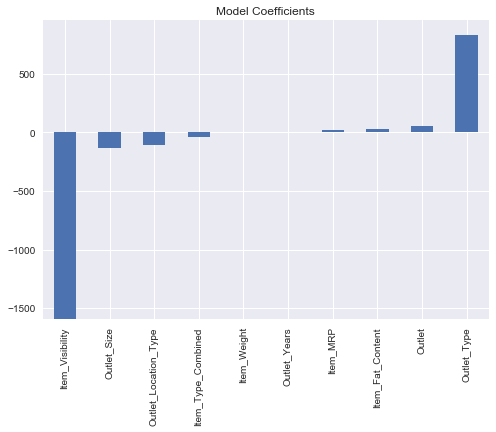

In [68]:
# a) Linear Regression
alg_LR = LinearRegression(normalize=True)
cv_score(alg_LR, train, test, predictors, target)
coef_LR = pd.Series(alg_LR.coef_, predictors).sort_values()
coef_LR.plot(kind='bar', title='Model Coefficients')
plt.show()


Model Report
Algorithm : Ridge
                   mean      std        min        max
R^2              0.4807   0.0229     0.4297     0.5227
Adjusted R^2     0.4810   0.0229     0.4300     0.5231
RMSE          1225.8329  48.1934  1164.3378  1323.7394


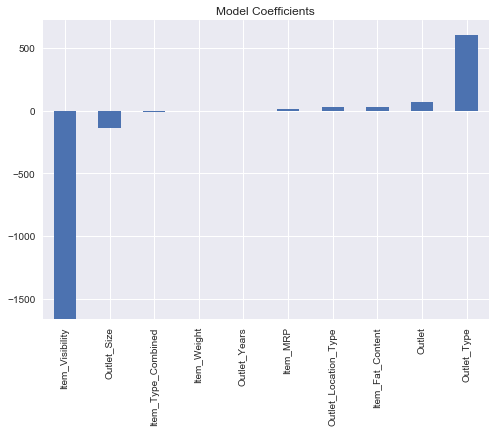

In [33]:
# b) Ridge regression
alg_Ridge = Ridge(alpha=0.25,normalize='True')
cv_score(alg_Ridge, train, test, predictors, target)
coef_Ridge = pd.Series(alg_Ridge.coef_, predictors).sort_values()
coef_Ridge.plot(kind='bar', title='Model Coefficients')
plt.show()

In [34]:
# c) K-Nearest Neighbours
alg_KNN = KNeighborsRegressor(n_neighbors=8,weights='distance')
cv_score(alg_KNN, train, test, predictors, target)


Model Report
Algorithm : KNeighborsRegressor
                   mean      std        min        max
R^2              0.5191   0.0492     0.3928     0.5845
Adjusted R^2     0.5195   0.0493     0.3930     0.5849
RMSE          1176.9974  40.6913  1101.6586  1245.4989


In [35]:
# d) Adaboost
alg_adaboost = AdaBoostRegressor(n_estimators=50)
cv_score(alg_adaboost, train, test, predictors, target)


Model Report
Algorithm : AdaBoostRegressor
                   mean      std        min        max
R^2              0.4852   0.0554     0.3868     0.5848
Adjusted R^2     0.4856   0.0554     0.3870     0.5852
RMSE          1229.6039  66.7689  1095.9037  1359.9556



Model Report
Algorithm : DecisionTreeRegressor
                   mean      std        min        max
R^2              0.5896   0.0385     0.5023     0.6583
Adjusted R^2     0.5901   0.0385     0.5027     0.6588
RMSE          1087.9760  45.1701  1011.2557  1173.4073


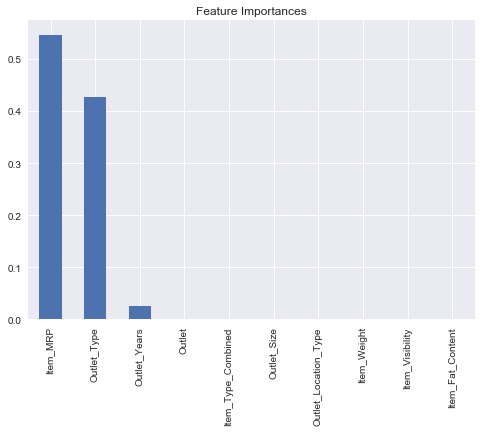

In [36]:
# e) Decision Tree
alg_DT = DecisionTreeRegressor(max_depth=5,min_samples_leaf=100)
cv_score(alg_DT, train, test, predictors, target)
coef_DT = pd.Series(alg_DT.feature_importances_, predictors).sort_values(ascending=False)
coef_DT.plot(kind='bar', title='Feature Importances')
plt.show()


Model Report
Algorithm : RandomForestRegressor
                   mean      std        min        max
R^2              0.5942   0.0340     0.5240     0.6527
Adjusted R^2     0.5946   0.0340     0.5244     0.6531
RMSE          1082.2935  42.9653  1020.2950  1160.1278


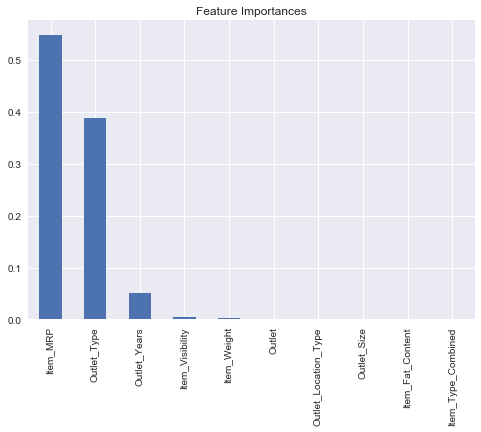

In [37]:
# f) Random Forest
alg_RF = RandomForestRegressor(max_depth=None,min_samples_leaf=100,n_estimators=100,n_jobs=4)
cv_score(alg_RF, train, test, predictors, target)
coef_RF = pd.Series(alg_RF.feature_importances_, predictors).sort_values(ascending=False)
coef_RF.plot(kind='bar', title='Feature Importances')
plt.show()